# Predict the Digits in Images Using a Logistic Regression Classifier in Python

### We’ll be using the digits dataset in the scikit learn library to predict digit values from images using the logistic regression model in Python.

# Importing libraries and their associated methods

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [7]:
# Split data into features (X) and labels (y)
X = mnist['data']
y = mnist['target'].astype(int)  # Convert labels to integers

In [9]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

# Select the first image in the dataset
first_image = X[0]

# Reshape the image to a 28x28 array
first_image_reshaped = first_image.reshape(28, 28)


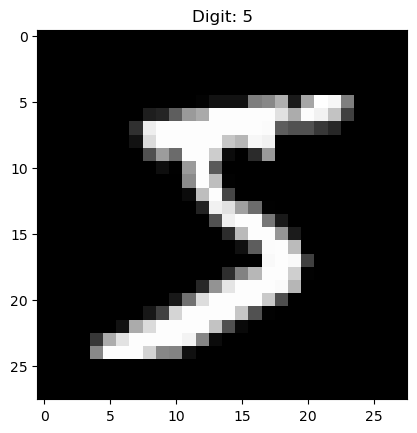

In [15]:
plt.imshow(first_image_reshaped, cmap='gray')
plt.title(f"Digit: {y[0]}")
plt.show()


In [17]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
# Combine them into a single DataFrame
df = pd.concat([X, y], axis=1)

# View the first few rows of the DataFrame
print(df.head)

# View the structure of the DataFrame
print(df.info())

<bound method NDFrame.head of        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0  

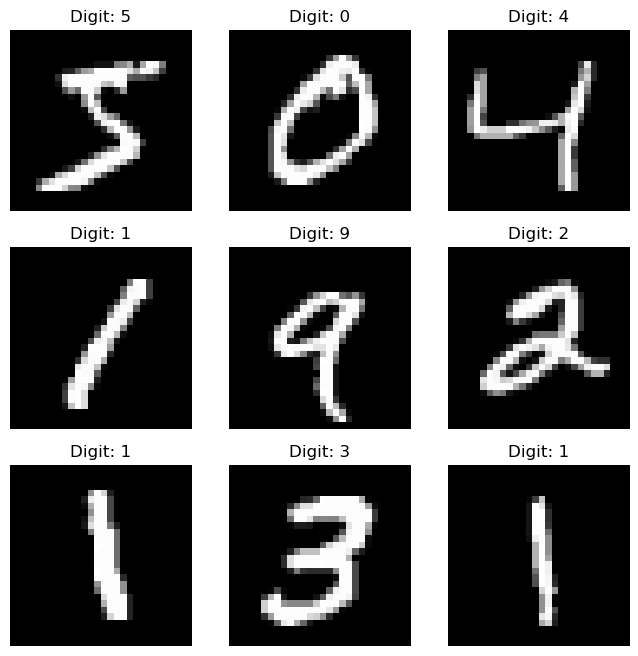

In [12]:
# Display the first 9 images and their labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    # Reshape the ith image and display it
    image = X[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    
    # Set the title as the corresponding label
    ax.set_title(f"Digit: {y[i]}")
    
    # Remove axes for a cleaner look
    ax.axis('off')

plt.show()


###  Normalize the features (optional, but helpful)

In [ ]:
X = X / 255.0

## Split the data into training and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Initialize and train the Logistic Regression model


In [30]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

In [31]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

### Predict on the test set

In [32]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([8, 4, 5, ..., 2, 7, 1])

## Evaluating the model

In [59]:
# Print the classification report
ClassificationReport =  classification_report(y_test, y_pred)
print('Classification Report: \n', ClassificationReport)

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.93      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [54]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', ConfusionMatrix)

Confusion Matrix: 
 [[1298    1    6    0    3   12   11    4    6    2]
 [   0 1548    6   10    3   12    0    4   15    2]
 [   5   19 1234   20   15   10   20   18   29   10]
 [   6   10   31 1280    1   39    7   19   23   17]
 [   5    2    6    5 1202    5   10    8    8   44]
 [   4   11    8   43   12 1121   21    4   35   14]
 [   6    5   19    1   14   16 1331    1    3    0]
 [   6    4   26    4   10    7    0 1415    1   30]
 [  10   26   13   46    6   43   10    9 1176   18]
 [   8   11    5   13   36    7    0   46   16 1278]]


In [52]:
AccuracyScore = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', AccuracyScore)

Accuracy Score:  0.9202142857142858


## Visualization

Text(95.72222222222221, 0.5, 'Actual')

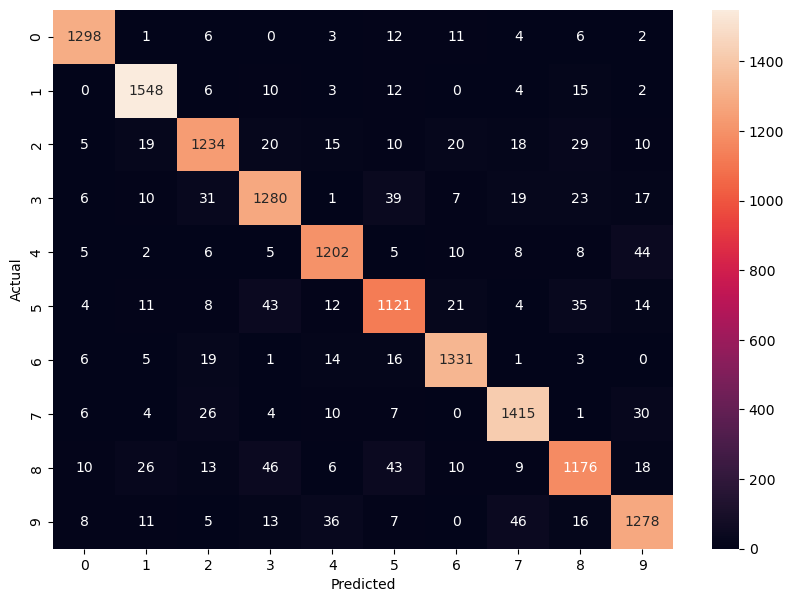

In [50]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(ConfusionMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [63]:
import pickle

# Save the model to disk
with open('logistic_regression_model_digits_dataset.pkl', 'wb') as file:
    pickle.dump(model, file)
